In [1]:
fdir = "../hanglog/dd_2020_12_28_112931"

import os
logfiles = os.listdir(fdir)
print(logfiles)
fLog = os.path.join(fdir, logfiles[0])

['hdata-2020-12-28_11-29-31.log']


In [2]:
import sys
sys.path.append("..")
import hacktrack.loaders
fd = hacktrack.loaders.FlyDat(fLog)

Extracting knowndate from filename: 2020-12-28
E:723, Y:2396, Z:2448, aF:132, aA:134, aZ:134
linAdifftime -72218.94155844155 count 154
Made for Q 0 last index 0
Made for V 0 last index 0
Loading aQV as no pQV records
Made for aQ 0 last index 0
Made for aV 0 last index 0
Missing GPS data, so setting t0 to 2020-12-28 11:25:07.806058


In [3]:
fd.LoadC()

Specify which data to load
E(n=723) ['m', 'd']
D(n=0) unknown
F(n=0) ['Pr']
L(n=0) ['Lg']
Q(n=0) ['u', 'lng', 'lat', 'alt', 'devno']
R(n=0) ['epoch', 'e', 'n', 'f', 'o', 'devno']
V(n=0) ['vel', 'deg', 'devno']
W(n=0) ['w', 'n']
Y(n=2396) ['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'q0', 'q1', 'q2', 'q3', 's']
Z(n=2448) ['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'q0', 'q1', 'q2', 'q3', 's']
U(n=0) ['Dust']
C(n=0) unknown
P(n=0) unknown
H(n=0) unknown
I(n=0) ['tI', 'tIA']
S(n=0) ['hS', 'tS']
G(n=0) ['hG', 'tG']
N(n=0) ['sN']
M(n=0) unknown
O(n=0) unknown
B(n=0) ['Prb', 'tB']
X(n=0) ['Dmb', 'tX', 'wms']
*(n=0) unknown
aF(n=132) ['Pr']
aQ(n=0) ['u', 'lng', 'lat', 'alt']
aA(n=134) ['ax', 'ay', 'az']
aV(n=0) ['vel', 'deg']
aU(n=0) ['b']
aZ(n=134) ['q1', 'q2', 'q3']


0

In [4]:
fd.LoadC("ZYE")

Made for Z 2448 last index 2448
Warning, using guessed (not GPS) timing corrected value on Z 2448
pCattrname pZ
Made for Y 2396 last index 2396
Warning, using guessed (not GPS) timing corrected value on Y 2396
pCattrname pY
BAD VALUES 1 [(722, 'End(5566,401)\n')]
Made for E 723 last index 722
Warning, using guessed (not GPS) timing corrected value on E 723
pCattrname pE


3

<IPython.core.display.Javascript object>


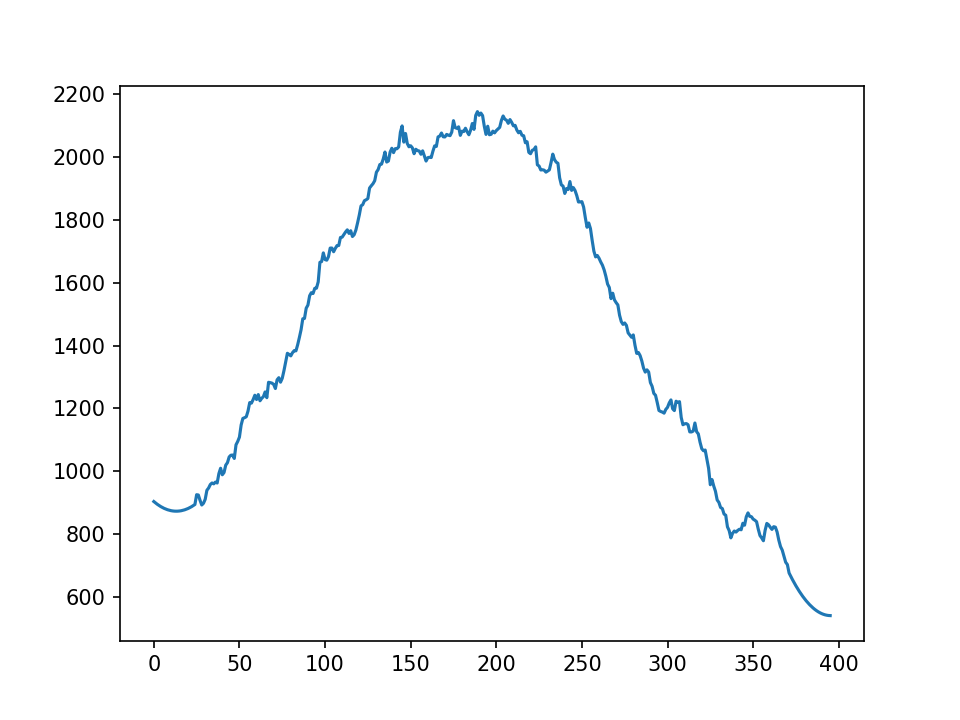

In [30]:
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib notebook

import scipy.signal as sig
a=fd.pE[fd.pE.m==1]
filt = sig.savgol_filter(a.d, 49,2)
plt.plot(filt)

In [ ]:
p = fd.pZ
p.columns

p['ax'][0:10].mean()

In [ ]:
import numpy as np

def set_zero(p):
    p.loc[:,'pitch'] = p['pitch']-p['pitch'].iloc[0]
    p.loc[:,'roll'] = p['roll']-p['roll'].iloc[0]
    p.loc[:,'heading'] = p['heading']-p['heading'].iloc[0]
    return p

def calc_a(p,g):
    set_zero(p)
    p.loc[:,'ax_calc']= -g * np.sin(np.radians(p['roll']))
    p.loc[:,'ay_calc']= -g * np.sin(np.radians(p['pitch']))
    return p

In [ ]:
pZ = fd.pZ[~fd.pZ.bad]
pY = fd.pY[~fd.pY.bad]

pZ

In [ ]:
ptest = calc_a(pZ, 9.81)


In [ ]:
ax_err = ptest['ax'] - ptest['ax_calc']
ay_err = ptest['ay'] - ptest['ay_calc']

In [ ]:
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib notebook

base = plt.subplot(211)
plt.plot(ptest.pitch, color = 'lightblue')
plt.plot(ptest.roll, color = 'orange')
plt.plot(ptest.ax, color = 'darkred')
plt.plot(ptest.ax_calc, color = 'red')
plt.plot(ptest.ay, color = 'darkblue')
plt.plot(ptest.ay_calc, color = 'blue')

err = plt.subplot(212, sharex = base)
plt.plot(ax_err,color ='red')
plt.plot(ay_err,color ='blue')

In [ ]:
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib notebook


plt.plot(pZ.pitch)
plt.plot(pZ.roll)
plt.plot(pZ.ax, color = 'black')


In [ ]:
import numpy as np
import scipy as sp
g=9.81
L = g * (7/(9*2*np.pi))**2
L

In [ ]:
plt.plot(pZ.roll)
plt.plot(-pY.roll)

In [ ]:
plt.plot(pZ.heading)
plt.plot(pY.heading+180)

In [ ]:
import hacktrack.clickables
hacktrack.clickables.plotinteractivegpstrack(fd)